### get the nodes and the links from wikipedia
https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters
 but this might not be enough. this list only shows a little bit of the characters.

In [70]:
import requests
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

# get the list of characters from wiki

cha_list_word = 'List_of_Harry_Potter_characters'

title = "titles={}".format(cha_list_word)
query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

r = requests.get(query)
text= r.text

In [71]:
cha_names=[]
spl = text.split('\\n*')
for each_spl in spl:
    contents = each_spl.split('\\u2013')
    if len(contents) >1:
#         print(contents[0])
        cha_names.append(contents[0])

In [77]:
print('number of characters from wikipedia:{}'.format(len(cha_names)))

number of characters from wikipedia:204


### try with fandom


In [18]:
import requests

hp_cat_url = 'https://harrypotter.fandom.com/api/v1/Articles/List?expand=1&category=Individuals&namespaces=0&limit=100'
r = requests.get(hp_cat_url)
response = r.json()

a = 0
sub_cat = []
for item in response['items']:
    a += 1
    print("{}\t{}\t({})".format(str(a),item['title'].encode(encoding='utf-8'),item['id']))
    title = str(item['title'].encode(encoding='utf-8'))
    sub_cat.append(title[2:-1])

1	b'Individual infobox test'	(191486)
2	b'Deities'	(163464)
3	b'Disowned individuals'	(167918)
4	b'Fictional characters'	(7830)
5	b'Homosexuals'	(218202)
6	b'Impersonated individuals'	(22241)
7	b'Individuals by house'	(191523)
8	b'Individuals by physical characteristics'	(214731)
9	b'Individuals by ability'	(9521)
10	b'Individuals by achievement'	(9522)
11	b'Individuals by allegiance'	(10221)
12	b'Individuals by class'	(15091)
13	b'Individuals by death'	(9905)
14	b'Individuals by deed'	(73564)
15	b'Individuals by era'	(122081)
16	b'Individuals by gender'	(9516)
17	b'Individuals by injury'	(9523)
18	b'Individuals by job'	(9538)
19	b'Individuals by marital status'	(119075)
20	b'Individuals by parentage'	(9645)
21	b'Individuals by place of origin'	(187776)
22	b'Individuals by place of residence'	(202826)
23	b'Individuals by relationship'	(10130)
24	b'Individuals by school'	(13832)
25	b'Individuals by species'	(9552)
26	b'Missing individuals'	(73563)
27	b'Objects with Personality'	(35200)


In [104]:
baseurl = "https://harrypotter.fandom.com/api/v1/Articles/List?"
expand = "expand=1"
namespaces = "namespaces=0"
limit = "limit={}".format(100)


cat_list = []
# not subcat in side the cat, just the character list
direct_cat = []

depth_control = 6


# get the list from a (fake)category
# if not a category, return itself
def get_list(sub_cat_name,depth):
    depth+=1
    if depth >= depth_control:
        print('*Depth warning.')
        return []
    l = []
    category = "category={}".format(sub_cat_name)
    query = "{}{}&{}&{}&{}".format(baseurl, expand, category, namespaces, limit)

    mark = True
    
    r = requests.get(query)
    response = r.json()
    if 'items' not in response.keys():
        mark = False

    if mark:      
        cat_list.append(sub_cat_name)
        for item in response['items']:
            title = str(item['title'].encode(encoding='utf-8'))[2:-1]
            if title == sub_cat_name:
                continue
            if title in cat_list: # if this category already went through
                print('*REPEATED cate: {}'.format(title))
                continue
            if title.startswith('Locations'):
                print('*Locations cate: {}'.format(title))
                continue
            if 'Creatures' in title:
                print('*Creatures cate: {}'.format(title))
                continue
            l.extend(get_list(title,depth))
            
        print('exploring category:{}'.format(sub_cat_name))

    else:
        l = [sub_cat_name]

    return l


for i,each_sub_cat in enumerate(sub_cat[20:25]):
    depth = 1
    print('*************************\nexploring category:{}\t{} START\n'.format(i,each_sub_cat))
    direct_cat.extend(get_list(each_sub_cat,depth))
    print('\nexploring category:{}\t{} FINISH\n*************************'.format(i,each_sub_cat))

*************************
exploring category:0	Individuals by place of origin START

exploring category:Individuals from alternate realities
exploring category:Emigrants
*Depth warning.
exploring category:Chadian individuals
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Egyptian individuals
*Depth warning.
*Depth warning.
exploring category:Ivorian individuals
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Nigerian individuals
exploring category:African individuals
exploring category:American individuals
*Depth warning.
*Depth warning.
exploring category:Chinese individuals
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Japanese individuals
*Depth warning.
*Depth warning.
ex

*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*REPEATED cate: Dumbledore family
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth

*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth w

In [105]:
len(direct_cat)

800

In [106]:
direct_cat_1_10_set = set(direct_cat)
print(len(direct_cat_1_10_set))
import json
file_path = './data/cha_names_partd(20-24).json'
with open(file_path,'w') as f:
    json.dump(direct_cat,f)

631


Get all nodes and remove the repeat ones and see the number of nodes.

In [1]:
folder_path = './data/cha_name_all/'

cha_all = []

import os
import json
file_list = os.listdir(folder_path)
for f_path in file_list:
    with open(os.path.join(folder_path,f_path),'r') as f:
        f_l = json.load(f)
    f_l = list(f_l)
    cha_all.extend(f_l)

In [2]:
cha_all = set(cha_all)
print('number of nodes:{}'.format(len(cha_all)))

number of nodes:3330


In [3]:
import json
with open('./data/cha_name_tmp.json','w') as f:
    json.dump(list(cha_all),f)

In [4]:
# get the name for file saving and reading
def file_saving_reading_name(s):
    s = s.replace(':','@')
    s = s.replace('/','$')
    return s

# get the name with ':' and '/'
def node_name(s):
    s = s.replace('@',':')
    s = s.replace('$','/')
    return s

In [6]:
import requests
from tqdm import tqdm

# download the pages
baseurl = "https://harrypotter.fandom.com/api.php?"
action = "action=query"
prop = "prop=revisions"
rvprop = "rvprop=content&rvparse=1"
format_ = "format=json"

fandom_folder = './data/cha_fandom_page'
len_cha = len(cha_all)

cha_all = list(cha_all)




# for each characters:
for i,each_cha in enumerate(cha_all[696:]):
    # deal with the character name
    each_cha = each_cha.replace(' ','_')  
    
    if r'\\' in each_cha:
        print(each_cha)
        continue
    
    print('downloading {}...\t{}\{}'.format(each_cha,i+696,len_cha))
    # query
    title = "titles={}".format(each_cha)
    query = "{}{}&{}&{}&{}&{}".format(baseurl, action,prop, title,rvprop,format_)
    
    try:
        r = requests.get(query)
        text= r.json()

        file_path = os.path.join(fandom_folder,file_saving_reading_name(each_cha)+'.json')

        with open(file_path,'w') as f:
            json.dump(text,f)
    except:
        print('*warning:{}'.format(each_cha))
    


downloading Robert_McGonagall_Senior...	696\3330
downloading Noz\xc3\xa9a_Lestrange_(n\xc3\xa9e_Trouche)...	697\3330
*warning:Noz\xc3\xa9a_Lestrange_(n\xc3\xa9e_Trouche)
downloading Hogwarts_Thestral_herd...	698\3330
downloading Sorting_statues...	699\3330
downloading Muggle-born...	700\3330
downloading Antonia_Creaseworthy...	701\3330
downloading Viktor_Krum's_grandfather...	702\3330
downloading Grugwyn_Rufford...	703\3330
downloading Unidentified_Ollivander's_assistant...	704\3330
downloading Stewart...	705\3330
downloading Father_Christmas...	706\3330
downloading Minerva_McGonagall...	707\3330
downloading Forbidden_Forest_wolf_pack...	708\3330
downloading Elphias_Doge's_file...	709\3330
downloading Delacour_sisters'_cousins...	710\3330
downloading Dexter_Fortescue...	711\3330
downloading Sara_Farnham...	712\3330
downloading Hogwarts_house-elves...	713\3330
downloading Grogan_Stump...	714\3330
downloading Penelope_Clearwater...	715\3330
downloading Randolph_Pauncefoot...	716\3330
dow

downloading Gifford_Ollerton...	886\3330
downloading Margaret_Ettington...	887\3330
downloading Ulick_Gamp...	888\3330
downloading Queenie_Goldstein's_wand...	889\3330
downloading Remus_Lupin...	890\3330
downloading Odbert...	891\3330
downloading D._Abramowic...	892\3330
downloading Elizabeth_McGilliguddy...	893\3330
downloading Angelina_Johnson...	894\3330
downloading Kikis_Trecus...	895\3330
downloading Investigative_Team...	896\3330
downloading Galileo_Galilei...	897\3330
downloading Unidentified_Slytherin_girl_(I)...	898\3330
downloading William_Friend...	899\3330
downloading Ruth_Winikus...	900\3330
downloading Unidentified_centaur...	901\3330
downloading Hocus-Pocus_(Daily_Prophet_segment)...	902\3330
downloading Unidentified_house-elf_near_the_Hogwarts_kitchens...	903\3330
downloading Veela_hair...	904\3330
downloading Unidentified_Giant_in_the_Battle_of_Hogwarts_(V)...	905\3330
downloading Ritchie_Coote...	906\3330
downloading Des_Pander...	907\3330
downloading Mathilda_Grimble

downloading Young_woman's_child...	1076\3330
downloading Bartemius_Crouch_Junior...	1077\3330
downloading Gryffindor_individual_infobox...	1078\3330
downloading Kay_Formby...	1079\3330
downloading Prince...	1080\3330
downloading Damara_Dodderidge...	1081\3330
downloading Nick_Alas...	1082\3330
downloading Goblin_jazz_singer...	1083\3330
downloading Percival_Graves'_wand...	1084\3330
downloading Corvus_Lestrange_(I)...	1085\3330
downloading G._Forbes...	1086\3330
downloading Vibes_Twins...	1087\3330
downloading Naoki_Tsuchiya...	1088\3330
downloading M._Young...	1089\3330
downloading Unidentified_fans_of_Gilderoy_Lockhart...	1090\3330
downloading Smirnoff...	1091\3330
downloading Colin_Creevey...	1092\3330
downloading Pippa_Macmillan...	1093\3330
downloading Unidentified_male_Death_Eater_killed_on_the_Hogwarts_Seventh_Floor...	1094\3330
downloading Albert_McCausland...	1095\3330
downloading Charlus_Potter's_son...	1096\3330
downloading Male_Muggle_Studies_teacher's_student_assistant...	

downloading Zakir_Akram...	1255\3330
downloading Dugald_McPhail...	1256\3330
downloading Patrick_Delaney-Podmore...	1257\3330
downloading Leta_Lestrange...	1258\3330
downloading Mudblood_Relocation_Camp...	1259\3330
downloading Beatrix_Bloxam's_cousins...	1260\3330
downloading Franklin_Greenwood...	1261\3330
downloading Dougal_McGregor's_wife...	1262\3330
downloading Leonardo_Da_Vinci...	1263\3330
downloading Travers...	1264\3330
downloading Winstanley...	1265\3330
downloading Edmund_Bollifant...	1266\3330
downloading Head_of_Slytherin_House...	1267\3330
downloading Mrs_Norris...	1268\3330
downloading Derek_(Wizard_Card_Collectors'_Club)...	1269\3330
downloading Medusa...	1270\3330
downloading Reggie_Page...	1271\3330
downloading Tut...	1272\3330
downloading Infant_Demonic...	1273\3330
downloading Stephenie_McMillan...	1274\3330
downloading David_Nolton...	1275\3330
downloading Mildred...	1276\3330
downloading Vinda_Rosier...	1277\3330
downloading Lycoris_Black...	1278\3330
downloading

downloading Quintia_McQuoid...	1448\3330
downloading Manami_Ichijoh...	1449\3330
downloading Fred_Weasley...	1450\3330
downloading Head_Curse-Breaker...	1451\3330
downloading Unidentified_pamphlet_maker_witch...	1452\3330
downloading Manager_at_Eeylops_Owl_Emporium...	1453\3330
downloading Unidentified_St_Mungo's_patient's_brother...	1454\3330
downloading Twinkle...	1455\3330
downloading Unidentified_TV_weatherman...	1456\3330
downloading Babayaga...	1457\3330
downloading Dragon_keeper...	1458\3330
downloading House_of_Tudor...	1459\3330
downloading Mulpepper...	1460\3330
downloading Unnamed_Kwidditch_players...	1461\3330
downloading Y._Blishen...	1462\3330
downloading Felicity_Eastchurch...	1463\3330
downloading Skye_Parkin...	1464\3330
downloading Girl_who_played_Asha...	1465\3330
downloading Matthew_Echunga...	1466\3330
downloading Myrtle_Warren...	1467\3330
downloading Unidentified_Ravenclaw_boy_(II)...	1468\3330
downloading Michael_Babatola...	1469\3330
downloading Unidentified_fo

downloading James_(Hufflepuff_Quidditch_player)...	1633\3330
downloading Arturo_Cephalopos...	1634\3330
downloading Carmen_Garcia...	1635\3330
downloading Theodore_Nott...	1636\3330
downloading Constance_Pickering...	1637\3330
downloading Fawcett...	1638\3330
downloading Avery_I...	1639\3330
downloading Mary_Dorkins...	1640\3330
downloading Borf...	1641\3330
downloading Constance_Pickering's_brother_(I)...	1642\3330
downloading Yvonne_Bampton...	1643\3330
downloading Unidentified_child_in_bubble...	1644\3330
downloading Maxwell_Lazenby...	1645\3330
downloading Janus_Thickey...	1646\3330
downloading Magee...	1647\3330
downloading Raymond_Bloom...	1648\3330
downloading Katie_Killick...	1649\3330
downloading Dobbin...	1650\3330
downloading Alexei_Levski...	1651\3330
downloading Kevinus_Morrisons...	1652\3330
downloading Aur\xc3\xa9lie_Dumont...	1653\3330
*warning:Aur\xc3\xa9lie_Dumont
downloading Magorian...	1654\3330
downloading Young_witch_maid...	1655\3330
downloading Chancellor_of_the

downloading Quintilla_Lestrange...	1822\3330
downloading Mathilde_Mallard...	1823\3330
downloading Jan_Kowalski...	1824\3330
downloading Harry_Potter...	1825\3330
downloading Plunkett...	1826\3330
downloading Neville_Longbottom's_first_wand...	1827\3330
downloading Gormless_Morgan's_friends...	1828\3330
downloading Syna_Hyslop...	1829\3330
downloading MacDuff...	1830\3330
downloading Jacqueline_Lejeune...	1831\3330
downloading Shanice_Higgins...	1832\3330
downloading Harold_Dingle...	1833\3330
downloading Fubster...	1834\3330
downloading Sirius_Black_I...	1835\3330
downloading George_III...	1836\3330
downloading Almeric_Sawbridge...	1837\3330
downloading Carlos_Clodoaldo...	1838\3330
downloading Timothy_Blenkinsop...	1839\3330
downloading Miranda_Goshawk's_cousins...	1840\3330
downloading Ragmar_Dorkins...	1841\3330
downloading Laura_Madley...	1842\3330
downloading Uagadou_School_Team...	1843\3330
downloading Aceline_Faure...	1844\3330
downloading Abraxas_Malfoy...	1845\3330
downloadin

downloading Unidentified_male_Auror_at_Hogwarts...	2006\3330
downloading Jack_"BtR"_Saxon/Hooch_draft...	2007\3330
*warning:Jack_"BtR"_Saxon/Hooch_draft
downloading Unidentified_Aurors...	2008\3330
downloading Me,_Myself_&_I...	2009\3330
downloading Yumbo...	2010\3330
downloading Dylan_Marwood...	2011\3330
downloading Sean_Miller...	2012\3330
downloading Unidentified_MACUSA_Aurors...	2013\3330
downloading Amelia_Fittleworth...	2014\3330
downloading Inigo_Fuente_Marrero...	2015\3330
downloading Karl_Jenkins...	2016\3330
downloading Theseus_Scamander...	2017\3330
downloading Edgar_Bones...	2018\3330
downloading Irma_Crabbe...	2019\3330
downloading Nicolas_Grimmett...	2020\3330
downloading F._Lestrange...	2021\3330
downloading Richard_Sky...	2022\3330
downloading Gordon's_parents...	2023\3330
downloading Unidentified_plump_little_witch_examiner...	2024\3330
downloading William_Weasley's_South_American_pen-friend...	2025\3330
downloading British_Prime_Minister_in_1996...	2026\3330
download

downloading Armand_Malfoy...	2198\3330
downloading Declan_Haworth...	2199\3330
downloading Torvus...	2200\3330
downloading Unidentified_Death_Eater_stunned_by_Harry_Potter_in_the_Grand_Staircase_Tower...	2201\3330
downloading Nitin_Divekar...	2202\3330
downloading Flurry...	2203\3330
downloading Unidentified_Canadian_Seer...	2204\3330
downloading Sirius_Black's_file...	2205\3330
downloading Nandini_Johar...	2206\3330
downloading Miniature_figurine_of_Viktor_Krum...	2207\3330
downloading Hogwartian...	2208\3330
downloading Sonnleitner...	2209\3330
downloading Filius_Flitwick...	2210\3330
downloading Dave_Monk...	2211\3330
downloading Amos_Diggory...	2212\3330
downloading Squib_individual_infobox...	2213\3330
downloading Model_dragon...	2214\3330
downloading Marvolo_Gaunt...	2215\3330
downloading Chambers...	2216\3330
downloading Ginger_(musician)...	2217\3330
downloading Headmaster_of_Castelobruxo_during_1989...	2218\3330
downloading Edgar_Wallace...	2219\3330
downloading Unidentified_R

downloading Earl_of_Paunchley's_forced_servants...	2383\3330
downloading Gringotts_Guards...	2384\3330
downloading George_Coutas...	2385\3330
downloading Sterling_McCubbin...	2386\3330
downloading Horcrux...	2387\3330
downloading Daryl_Morden...	2388\3330
downloading Jada_Angela...	2389\3330
downloading Licorus_Black...	2390\3330
downloading Portrait_of_Five_Wizards...	2391\3330
downloading Albus_Potter's_wand...	2392\3330
downloading Most_Extraordinary_Society_of_Potioneers...	2393\3330
downloading Family_that_lived_in_Gregorovitch's_former_home...	2394\3330
downloading Louis_Gage...	2395\3330
downloading Bald_Healer...	2396\3330
downloading Yann_Fredericks...	2397\3330
downloading Gerard_Willerby...	2398\3330
downloading Apothecary_shopkeeper...	2399\3330
downloading Sports...	2400\3330
downloading Theophilus_Abbot...	2401\3330
downloading Helmut_Weiss...	2402\3330
downloading Alicia_Spinnet...	2403\3330
downloading Rutherford_Poke...	2404\3330
downloading Mundungus_Fletcher...	2405\

downloading Poppy_Pomfrey's_wand...	2567\3330
downloading Mathilda_Greenford...	2568\3330
downloading Armando_Dippet...	2569\3330
downloading Propaganda...	2570\3330
downloading Zonko...	2571\3330
downloading Jessica_Tring...	2572\3330
downloading Libatius_Borage...	2573\3330
downloading Reynard_Gage...	2574\3330
downloading Unidentified_fourth_year_student...	2575\3330
downloading Chris_Lunney...	2576\3330
downloading Sadie_Baldock...	2577\3330
downloading Stephen_Cornfoot...	2578\3330
downloading Young_woman...	2579\3330
downloading Blinkhorn...	2580\3330
downloading Mundungus_Fletcher's_wand...	2581\3330
downloading Lily_Moon...	2582\3330
downloading Lisa_Cullen...	2583\3330
downloading Blaise_Zabini...	2584\3330
downloading Death_Eater_individual_infobox...	2585\3330
downloading Matilda_Dukelow...	2586\3330
downloading M._L._Miraphorum...	2587\3330
downloading Gareth_Pewsey...	2588\3330
downloading Painting_of_sinister-looking_monks...	2589\3330
downloading Edmund_Gaddlegate...	259

downloading Unidentified_Black_Death_Eater_at_the_Battle_of_Hogwarts_(II)...	2751\3330
downloading Dennis_Creevey...	2752\3330
downloading Edward...	2753\3330
downloading Tertius...	2754\3330
downloading Unidentified_Male_Death_Eater_(VIII)...	2755\3330
downloading Pyrites...	2756\3330
downloading Unidentified_Gryffindor_beater...	2757\3330
downloading House-elf_armour...	2758\3330
downloading Jack_"BtR"_Saxon/Vector_draft...	2759\3330
*warning:Jack_"BtR"_Saxon/Vector_draft
downloading Gianna_Grace_Marie...	2760\3330
downloading Justin_Finch-Fletchley...	2761\3330
downloading Vampire_in_Minsk...	2762\3330
downloading Dennis_Aldermaston...	2763\3330
downloading K._Machadus...	2764\3330
downloading Threat_meter...	2765\3330
downloading Borys_the_Brute...	2766\3330
downloading Wakefield_(spell_inventor)...	2767\3330
downloading Stephen_Gould...	2768\3330
downloading Montgomery...	2769\3330
downloading Yuri_Blishenov...	2770\3330
downloading Gemma_Farley...	2771\3330
downloading Bartemius_

downloading Keiko_Takahashi...	2933\3330
downloading Cho_Chang's_father...	2934\3330
downloading Portrait...	2935\3330
downloading Flavius_Belby...	2936\3330
downloading Goliath...	2937\3330
downloading Fulcran_Lestrange_(II)...	2938\3330
downloading Penelope_Fawley's_father...	2939\3330
downloading Name...	2940\3330
downloading Menzies...	2941\3330
downloading Elsbeth_McCormick...	2942\3330
downloading Merula_Snyde...	2943\3330
downloading Warlock_of_the_Month...	2944\3330
downloading Penelope_Fawley...	2945\3330
downloading Bob_Ogden's_wand...	2946\3330
downloading Wilkie_Twycross...	2947\3330
downloading Charles_Weasley...	2948\3330
downloading Flora_and_Hestia_Carrow...	2949\3330
downloading SOS_Assignment...	2950\3330
downloading Lesley_Toddington...	2951\3330
downloading Delfina_Crimp...	2952\3330
downloading E._L._Filhus...	2953\3330
downloading Daily_Prophet_articles...	2954\3330
downloading Martine_Copplestone...	2955\3330
downloading Jack_Sloper...	2956\3330
downloading Cyril

downloading Sofie...	3119\3330
downloading Marcus_Hitchin's_mother...	3120\3330
downloading Nigel's_nephew...	3121\3330
downloading Roberts_children...	3122\3330
downloading Annabel_Entwhistle...	3123\3330
downloading Sunday_Prophet...	3124\3330
downloading Tiberius...	3125\3330
downloading Vikram_Thakur...	3126\3330
downloading Hannah_Abbott's_mother...	3127\3330
downloading Aragog...	3128\3330
downloading Order_of_the_Phoenix_individual_infobox...	3129\3330
downloading Giant_colony...	3130\3330
downloading E._A._Limus...	3131\3330
downloading Todoroki...	3132\3330
downloading Wayne_Bostock...	3133\3330
downloading David_Yates_(in-universe)...	3134\3330
downloading Abracadabra...	3135\3330
downloading Molly_Weasley_II...	3136\3330
downloading Spencer_Whiddon...	3137\3330
downloading Bespectacled_Slytherin_girl...	3138\3330
downloading Gellert_Grindelwald's_acolytes...	3139\3330
downloading St_Mungo's_Hospital_for_Magical_Maladies_and_Injuries_Known_Patients...	3140\3330
downloading Ab

downloading Unidentified_Death_Eater_who_tortured_a_wizard...	3304\3330
downloading Poppy_Pomfrey...	3305\3330
downloading Head_of_Gryffindor_House...	3306\3330
downloading Half-blood...	3307\3330
downloading Scrivenshaft...	3308\3330
downloading Giant_chess_mechanism...	3309\3330
downloading Wilkes...	3310\3330
downloading Bran_the_Bloodthirsty...	3311\3330
downloading Alfred_Cattermole...	3312\3330
downloading Toad_Toazer...	3313\3330
downloading Delphini...	3314\3330
downloading Unidentified_Slytherin_girl_(IV)...	3315\3330
downloading Edward_Lupin...	3316\3330
downloading Mandrake...	3317\3330
downloading Arthur_Weasley's_ten_unidentified_subordinates...	3318\3330
downloading Little_Hangleton_boys...	3319\3330
downloading George_W._Bush...	3320\3330
downloading Edmund_Major_II...	3321\3330
downloading Caractacus_Burke...	3322\3330
downloading Charlie_Farley...	3323\3330
downloading Alain_Lacroix...	3324\3330
downloading Octavius_Pepper...	3325\3330
downloading Bane...	3326\3330
dow

In [15]:
# after getting all files-> file the links and store them

# 1. get all the notes
all_nodes = []
all_cha_json_files = os.listdir(fandom_folder)
for each in all_cha_json_files:
    cha_name = node_name(each.split('.json')[0])
    all_nodes.append(cha_name)

print('number of nodes:{}'.format(len(all_nodes)))
with open('./data/all_nodes.json','w') as f:
    json.dump(list(all_nodes),f)

number of nodes:2828


In [16]:
# before step 2 define a function to get the link list from a text
# using 正则 正则英文怎么说忘了！
import re
def get_links(text):
    pattern=re.compile(r'<a href="/wiki/.*?" title=".*?">')
    result= pattern.findall(str(text))
    list_link=[]
    for x in result:
        x=x.split(' title')
        href=x[0].split('href="/wiki/')[-1].split('"')[0]
        list_link.append(href)
    return list_link

In [27]:
# 2. in each json file get the links and stroe it in a dictionary
# format{node_name:[linked_node_1, linked_node_2, ... ], ...}

node_edges = {}

num_of_nodes = len(all_nodes)
folder = './data/cha_fandom_page/'

for i,node in enumerate(all_nodes):
    # 2.1 get the json file 
    json_path = os.path.join(folder,file_saving_reading_name(node)+'.json')
    with open(json_path,'r') as f:
        text = json.load(f)

#     print(str(text)[:30])
    
    # get the links from text
    raw_links = get_links(text)
    
    # avoid repeating
    raw_links = list(set(raw_links))
    
    # check if links are from the nodes_list
    true_links = []
    for link in raw_links:
        if link in all_nodes:
            true_links.append(link)
    
    node_edges[node] = true_links
    print('{}/{}\tnode {} has {} links'.format(i+1,num_of_nodes,node,len(true_links)))

1/2828	node 16th_century_Potions_Professor has 78 links
2/2828	node 1992_Gryffindor-Slytherin_Quidditch_match_spectators has 11 links
3/2828	node 1996_Gryffindor_Quidditch_Keeper_trials_spectators has 4 links
4/2828	node A.J._Mennett has 0 links
5/2828	node A._Criddle has 0 links
6/2828	node A._Fenetre has 59 links
7/2828	node Abbott has 3 links
8/2828	node Abel_Treetops has 1 links
9/2828	node Abernathy's_wand has 3 links
10/2828	node Abernathy has 54 links
11/2828	node Abigail_Nicola has 100 links
12/2828	node Abigail_R._Cankus has 0 links
13/2828	node Able_Fleming has 39 links
14/2828	node Able_Spudmore has 2 links
15/2828	node Abracadabra has 57 links
16/2828	node Abraham_Grimblehawk has 5 links
17/2828	node Abraham_Peasegood has 0 links
18/2828	node Abraham_Potter has 41 links
19/2828	node Abraxas_Malfoy has 11 links
20/2828	node Aceline_Faure has 0 links
21/2828	node Achilles_Tolliver has 39 links
22/2828	node Acolyte_thug has 2 links
23/2828	node Action_figure has 10 links
24/28

201/2828	node Arturo_Cephalopos has 2 links
202/2828	node Art_Classroom has 8 links
203/2828	node Art_Club_for_Gryffindor has 1 links
204/2828	node Art_Deco has 1 links
205/2828	node Art_historian has 2 links
206/2828	node Asgeir_Knutsen has 66 links
207/2828	node Asha has 15 links
208/2828	node Ashok_Khanna has 0 links
209/2828	node Ask_D._Shaman has 57 links
210/2828	node Assassin has 2 links
211/2828	node Astoria_Malfoy's_ancestor has 3 links
212/2828	node Astoria_Malfoy has 8 links
213/2828	node Astrix_Alixan has 100 links
214/2828	node Astronomer has 6 links
215/2828	node Astronomy_department has 2 links
216/2828	node Astro_News has 57 links
217/2828	node Atsushi_Takagi has 0 links
218/2828	node Audrey_Weasley has 4 links
219/2828	node Augusta_Longbottom has 72 links
220/2828	node Augustus_Pye has 23 links
221/2828	node Augustus_Rookwood has 58 links
222/2828	node Auror has 74 links
223/2828	node Aurora_Sinistra has 62 links
224/2828	node Austin_Guthrie has 0 links
225/2828	node A

430/2828	node Carrow_(1920s) has 15 links
431/2828	node Caspar_Crouch's_son has 8 links
432/2828	node Caspar_Crouch has 5 links
433/2828	node Cassandra_(Hogwarts_student) has 9 links
434/2828	node Cassandra_Vablatsky has 106 links
435/2828	node Cassius_Warrington has 108 links
436/2828	node Cast-a-Spell_training_room has 0 links
437/2828	node Catriona_McCormack has 67 links
438/2828	node Catullus_Spangle has 2 links
439/2828	node Caua_Nemerus has 0 links
440/2828	node Cauldron_monster has 1 links
441/2828	node Cavalier has 2 links
442/2828	node Cecilia has 8 links
443/2828	node Cecilia_Gallerani has 7 links
444/2828	node Cecily has 2 links
445/2828	node Cecil_Lee has 17 links
446/2828	node Cedrella_Black has 27 links
447/2828	node Cedric has 2 links
448/2828	node Cedric_Diggory's_friends has 3 links
449/2828	node Cedric_Diggory's_mother has 6 links
450/2828	node Cedric_Diggory's_wand has 6 links
451/2828	node Cedric_Diggory has 169 links
452/2828	node Celestina_Warbeck's_father has 2 l

648/2828	node Dennis_Bishop has 3 links
649/2828	node Dennis_Creevey has 47 links
650/2828	node Dennis_Moon has 68 links
651/2828	node Dentist has 4 links
652/2828	node Derek_(turtle_talker) has 0 links
653/2828	node Derek_(Wizard_Card_Collectors'_Club) has 1 links
654/2828	node Derwent_Shimpling has 96 links
655/2828	node Des_Pander has 0 links
656/2828	node Devil's_Snare has 26 links
657/2828	node Devil has 3 links
658/2828	node Devlin_Whitehorn has 96 links
659/2828	node Dexter_Fortescue has 65 links
660/2828	node Diane_Carter has 1 links
661/2828	node Diego_Caplan's_grandfather has 1 links
662/2828	node Diego_Caplan has 7 links
663/2828	node Dietrich_Frenzen has 0 links
664/2828	node Dilys_Derwent has 79 links
665/2828	node Dinah_Stevenson has 0 links
666/2828	node Director_of_the_Investigation_Department_and_Ministry_Police has 0 links
667/2828	node Director_of_the_Investigation_Department_No._61042 has 34 links
668/2828	node Director_of_the_Ministry_Police_No._41041 has 1 links
6

844/2828	node Ethan_Gerard has 100 links
845/2828	node Ethan_Parkin has 4 links
846/2828	node Eugene_Belcher has 0 links
847/2828	node Eugene_McAllister has 0 links
848/2828	node Eulalie_Hicks has 3 links
849/2828	node Eunice_Cabanart has 0 links
850/2828	node Euphemia_Potter has 14 links
851/2828	node Eurig_Cadwallader has 1 links
852/2828	node Eustace_Fawley's_father has 2 links
853/2828	node Eustace_Fawley has 2 links
854/2828	node Evangeline_Orpington's_wand has 1 links
855/2828	node Evans_sisters'_father has 10 links
856/2828	node Evans_sisters'_mother has 10 links
857/2828	node Evan_Rosier has 52 links
858/2828	node Everard has 53 links
859/2828	node Evil_sorcerer has 12 links
860/2828	node Executioner has 43 links
861/2828	node Expelliarmus_Gargoyle has 2 links
862/2828	node F._Lestrange has 4 links
863/2828	node Fabian_and_Gideon_Prewett has 3 links
864/2828	node Fabian_Prewett's_watch has 2 links
865/2828	node Fabius_Watkins has 65 links
866/2828	node Face_Paint_Kid has 1 link

1054/2828	node Goldstein_sisters'_grandfather has 2 links
1055/2828	node Goldstein_sisters'_mother has 4 links
1056/2828	node Golgomath has 60 links
1057/2828	node Goliath's_slayer has 2 links
1058/2828	node Goliath has 109 links
1059/2828	node Gondoline_Oliphant has 97 links
1060/2828	node Gondulphus_Graves has 40 links
1061/2828	node Goodwin's_Finest_Ice_Cream has 0 links
1062/2828	node Goodwin_Kneen has 65 links
1063/2828	node Google_Flange has 7 links
1064/2828	node Gordon's_parents has 1 links
1065/2828	node Gordon has 3 links
1066/2828	node Gordon_Brown has 4 links
1067/2828	node Gordon_Pummell_(I) has 0 links
1068/2828	node Gormlaith_Gaunt's_second_wand has 2 links
1069/2828	node Gormless_Morgan's_friends has 2 links
1070/2828	node Gormless_Morgan has 1 links
1071/2828	node Gornuk has 12 links
1072/2828	node Gossamer has 1 links
1073/2828	node Graham_Montague has 106 links
1074/2828	node Graham_Romsey has 10 links
1075/2828	node Grangers'_dogs has 0 links
1076/2828	node Grawp's_

1241/2828	node Horace_Slughorn has 159 links
1242/2828	node Horcrux has 34 links
1243/2828	node Horcrux_infobox has 0 links
1244/2828	node Horned_Serpent has 14 links
1245/2828	node Hortense_Cooper has 3 links
1246/2828	node Hortense_Rowland has 0 links
1247/2828	node Hortensia_Milliphutt has 23 links
1248/2828	node Hothoof has 0 links
1249/2828	node House-elf has 37 links
1250/2828	node House-elf_armour has 2 links
1251/2828	node House-elf_individual_infobox has 0 links
1252/2828	node House_of_Black_house-elves has 5 links
1253/2828	node House_of_Tudor has 7 links
1254/2828	node Hufflepuff's_Cup has 17 links
1255/2828	node Hufflepuff_boy_that_blames_Harry_Potter_(I) has 2 links
1256/2828	node Hufflepuff_boy_that_blames_Harry_Potter_(II) has 2 links
1257/2828	node Hufflepuff_common_room_painting has 1 links
1258/2828	node Hufflepuff_Duelling_Club_Captain has 36 links
1259/2828	node Hufflepuff_individual_infobox has 0 links
1260/2828	node Hufflepuff_Wizard_Duelling_Champion has 4 links


1446/2828	node Kennilworthy_Whisp has 2 links
1447/2828	node Kenny_Markham has 0 links
1448/2828	node Kevinus_Morrisons has 1 links
1449/2828	node Kevin_(2000s_Hogwarts_student) has 4 links
1450/2828	node Kevin_Bletchley has 102 links
1451/2828	node Kevin_Entwhistle has 4 links
1452/2828	node Kevin_Hopwood has 0 links
1453/2828	node Khanna_family_house-elf has 2 links
1454/2828	node Kids_Corner has 57 links
1455/2828	node Kikis_Trecus has 58 links
1456/2828	node Kimiko_Kurosawa has 66 links
1457/2828	node Kim_Sheringham has 3 links
1458/2828	node King's_Cross_Station_guard has 3 links
1459/2828	node Kingsley_Shacklebolt has 122 links
1460/2828	node King_(Babbitty_Rabbitty_and_her_Cackling_Stump) has 16 links
1461/2828	node Kinjal_Bhatia has 0 links
1462/2828	node Kirley_Duke has 99 links
1463/2828	node Kitty_Sharp has 1 links
1464/2828	node Knight_Bus_conductor has 1 links
1465/2828	node Knight_with_an_arrow_sticking_out_of_his_forehead has 2 links
1466/2828	node Koldovstoretz_potions_

1646/2828	node Manager_of_Flourish_and_Blotts has 25 links
1647/2828	node Manager_of_Gambol_and_Japes_Wizarding_Joke_Shop has 22 links
1648/2828	node Manami_Ichijoh has 0 links
1649/2828	node Mandrake has 17 links
1650/2828	node Mandy_Brocklehurst has 3 links
1651/2828	node Man_who_gave_Mr_Roberts_Galleons has 3 links
1652/2828	node Man_with_knowledge_of_the_Taboo has 4 links
1653/2828	node Maple_and_phoenix_feather_wand has 2 links
1654/2828	node Marauder's_Map has 31 links
1655/2828	node Marcus_Belby's_father has 3 links
1656/2828	node Marcus_Belby has 14 links
1657/2828	node Marcus_Fenwick has 13 links
1658/2828	node Marcus_Hitchin's_mother has 1 links
1659/2828	node Marcus_Hitchin has 4 links
1660/2828	node Marcus_Minugius has 0 links
1661/2828	node Margaret_Ettington has 0 links
1662/2828	node Maria_Glossop has 1 links
1663/2828	node Maria_Monteith has 66 links
1664/2828	node Marietta_Edgecombe's_father has 2 links
1665/2828	node Marilias_Kistmanus has 0 links
1666/2828	node Mariu

1848/2828	node Myrtle_Warren has 29 links
1849/2828	node N._Amorinus has 0 links
1850/2828	node N._Newzer has 1 links
1851/2828	node Naasz has 2 links
1852/2828	node Nagel has 12 links
1853/2828	node Nagini has 81 links
1854/2828	node Nagnok has 2 links
1855/2828	node Name has 1 links
1856/2828	node Name_author has 1 links
1857/2828	node Naming_Seer has 6 links
1858/2828	node Nandini_Johar has 1 links
1859/2828	node Nanette_Desford has 1 links
1860/2828	node Naoki_Tsuchiya has 0 links
1861/2828	node Napier has 0 links
1862/2828	node Narcissa_Malfoy's_second_wand has 5 links
1863/2828	node Narcissa_Malfoy's_wand has 6 links
1864/2828	node Narcissa_Malfoy has 75 links
1865/2828	node Nash has 0 links
1866/2828	node Natalie_Fairbourne has 3 links
1867/2828	node Natalie_Holkham has 100 links
1868/2828	node Natalya has 2 links
1869/2828	node Nathaniel_Douglas has 0 links
1870/2828	node Ned has 2 links
1871/2828	node Neil_Randall has 33 links
1872/2828	node Nerissa_Brody has 10 links
1873/282

2045/2828	node Potage has 35 links
2046/2828	node Potioneer has 37 links
2047/2828	node Potions_(Daily_Prophet_segment) has 57 links
2048/2828	node Potions_Club_girl has 8 links
2049/2828	node Potter_memorial has 3 links
2050/2828	node Prendergast has 2 links
2051/2828	node President_of_the_Council_of_Magic has 0 links
2052/2828	node President_of_the_United_States_of_America has 1 links
2053/2828	node Priest_who_comforted_Nicholas_de_Mimsy-Porpington has 1 links
2054/2828	node Prime_Minister's_political_opponent has 7 links
2055/2828	node Prime_Minister's_predecessor has 5 links
2056/2828	node Prime_Minister has 3 links
2057/2828	node Prime_Minister_(title) has 6 links
2058/2828	node Primpernelle has 20 links
2059/2828	node Prince has 8 links
2060/2828	node Priscilla_Dupont has 25 links
2061/2828	node Professor has 63 links
2062/2828	node Propaganda has 8 links
2063/2828	node Proudfoot has 37 links
2064/2828	node Prudence has 1 links
2065/2828	node Puddifoot has 16 links
2066/2828	node

2250/2828	node Sea_Serpent_of_Cromer has 2 links
2251/2828	node Second_semi-finalist_of_the_1379_duelling_contest has 5 links
2252/2828	node Secret_student_sweetshop_manager has 1 links
2253/2828	node Security_Advisor has 1 links
2254/2828	node Security_troll has 10 links
2255/2828	node Security_Warlock has 0 links
2256/2828	node Seer has 16 links
2257/2828	node Selina_Moore has 0 links
2258/2828	node Selina_Sapworthy has 16 links
2259/2828	node Selma has 4 links
2260/2828	node Senior_Undersecretary_to_the_Minister_for_Magic has 10 links
2261/2828	node Septima_Vector has 60 links
2262/2828	node Septimus_Malfoy has 9 links
2263/2828	node Septimus_Weasley has 30 links
2264/2828	node Seraphina_Bones has 2 links
2265/2828	node Seraphina_Picquery has 53 links
2266/2828	node Serpent_of_Slytherin has 71 links
2267/2828	node Seventh_Floor_Gryffindor_Prefect has 2 links
2268/2828	node Severus_Snape has 226 links
2269/2828	node Shady_Character has 0 links
2270/2828	node Shanice_Higgins has 65 li

2444/2828	node Tom_Riddle has 189 links
2445/2828	node Tom_Riddle_Senior has 17 links
2446/2828	node TongueBurners_Ltd has 0 links
2447/2828	node Torquil_McTavish has 2 links
2448/2828	node Torquil_Travers has 40 links
2449/2828	node Torvus'_father has 3 links
2450/2828	node Torvus has 5 links
2451/2828	node Tracey_Davis has 2 links
2452/2828	node Tracey_Nettlebed has 2 links
2453/2828	node Trace_Charm has 1 links
2454/2828	node Tracie_Everson has 0 links
2455/2828	node Trading_Card_Shop_shopkeeper has 22 links
2456/2828	node Tragedies has 57 links
2457/2828	node Transylvanian_farmer has 2 links
2458/2828	node Transylvanian_Head_of_Magical_Cooperation has 1 links
2459/2828	node Travers has 87 links
2460/2828	node Trevor has 13 links
2461/2828	node Trevor_Birch's_mother has 1 links
2462/2828	node Trevor_Birch has 34 links
2463/2828	node Trev_Mallory has 100 links
2464/2828	node Tricks_&_Trucks has 0 links
2465/2828	node Trinity_Lynn has 100 links
2466/2828	node Trisha_Buttermere has 0 l

2620/2828	node Unidentified_male_Death_Eater_killed_by_a_grey_haired_wizard has 4 links
2621/2828	node Unidentified_male_Death_Eater_killed_on_the_Hogwarts_Seventh_Floor has 2 links
2622/2828	node Unidentified_male_Egyptian_in_the_Weasleys'_photograph_(III) has 0 links
2623/2828	node Unidentified_male_Muggle_Studies_teacher has 51 links
2624/2828	node Unidentified_male_Seer has 11 links
2625/2828	node Unidentified_Male_Snatcher_at_Diagon_Alley has 3 links
2626/2828	node Unidentified_Male_Snatcher_during_the_Battle_of_Hogwarts has 3 links
2627/2828	node Unidentified_man_killed_in_the_courtyard_explosion has 0 links
2628/2828	node Unidentified_Merman_(Black_Lake) has 2 links
2629/2828	node Unidentified_Ministry_of_Magic_Wizard_at_the_1994_Quidditch_World_Cup has 12 links
2630/2828	node Unidentified_Ministry_witch_(I) has 0 links
2631/2828	node Unidentified_Ministry_Wizard_in_1997_(I) has 3 links
2632/2828	node Unidentified_Mould-on-the-Wold_boys has 3 links
2633/2828	node Unidentified_Na

2798/2828	node Yatin_Bhagat has 0 links
2799/2828	node Ya_Zhou has 0 links
2800/2828	node Ye_Olde_Curiosity_Shop_shopkeeper has 8 links
2801/2828	node Yolanda_Reedham has 0 links
2802/2828	node Yoshihiro_Suzuki has 66 links
2803/2828	node Young_witch_maid has 8 links
2804/2828	node Young_woman's_child has 13 links
2805/2828	node Young_woman has 12 links
2806/2828	node Yumbo has 1 links
2807/2828	node Yurika_Haneda has 0 links
2808/2828	node Yuri_Blischen has 0 links
2809/2828	node Yuri_Blishen has 0 links
2810/2828	node Yuri_Blishenov has 1 links
2811/2828	node Yuri_Von_Blisch has 0 links
2812/2828	node Yusuf_Kama's_wand has 4 links
2813/2828	node Yusuf_Kama has 19 links
2814/2828	node Yvette_Coquelot has 0 links
2815/2828	node Yvonne_Bampton has 0 links
2816/2828	node Zaccaria_Innocenti has 0 links
2817/2828	node Zacharias_Smith has 134 links
2818/2828	node Zakir_Akram has 0 links
2819/2828	node Zamira_Gulch has 57 links
2820/2828	node Zara_Valli has 12 links
2821/2828	node Zeph_Salva

In [28]:
# 3. store the node egdes into json file
json_file = './data/nodes_egdes.json'
with open(json_file,'w') as f:
    json.dump(node_edges,f)

In [30]:
# calculate how many links we have
num_of_links = 0 
for each in node_edges:
    num_of_links+=len(node_edges[each])
print('number of nodes:{}\nnumber of links:{}'.format(len(all_nodes),num_of_links))

number of nodes:2828
number of links:61263


In [32]:
# buidling the network
import networkx as nx

# bulid the network from data 
G = nx.DiGraph()

# add nodes    
G.add_nodes_from(node_edges.keys())

# add links
for each in node_edges:
    for link in node_edges[each]:
        G.add_edge(each,link)

print('number of nodes in network:{}'.format(len(G.nodes())))
print('number of links in network:{}'.format(len(G.edges())))

number of nodes in network:2828
number of links in network:61263


In [33]:
# extract the largest component 
largest_cc = max(nx.weakly_connected_components(G), key=len)
print('Number of nodes in the largest component:{}'.format(len(largest_cc)))
GCC = G.subgraph(largest_cc)
print('Number of links in the largest component:{}'.format(len(GCC.edges())))

Number of nodes in the largest component:2294
Number of links in the largest component:61136


In degree	max:868	min:0
Out degree	max:425	min:0
Nodes with in-degree larger than 100: 144


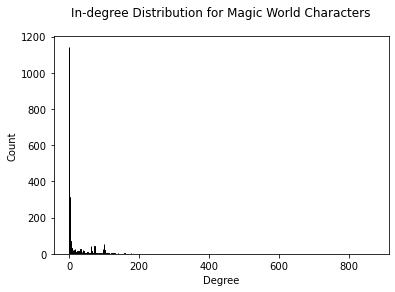

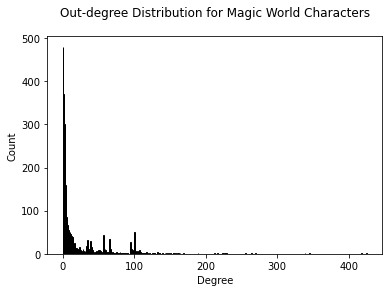

In [42]:
# degree distribution
import collections
import matplotlib.pyplot as plt
in_degrees = [d for n,d in G.in_degree()]
out_degrees = [d for n,d in G.out_degree()]


def plot_degree_distribution(degrees,title):
    degreeCount = collections.Counter(degrees)
    degree, count = zip(*degreeCount.items())

    # plot
    width = 1.0
    plt.bar(degree,count, align='center', width=width,edgecolor ='black',color = 'lightblue')
#     plt.hist(degrees,bins=1000,edgecolor ='black',color = 'lightblue')
    plt.title(title,pad = 20.0)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()
    
print('In degree\tmax:{}\tmin:{}'.format(max(in_degrees),min(in_degrees)))
print('Out degree\tmax:{}\tmin:{}'.format(max(out_degrees),min(out_degrees)))
print('Nodes with in-degree larger than 100: {}'.format(len([i for i in in_degrees if i >100])))
plot_degree_distribution(in_degrees,'In-degree Distribution for Magic World Characters')
plot_degree_distribution(out_degrees,'Out-degree Distribution for Magic World Characters')

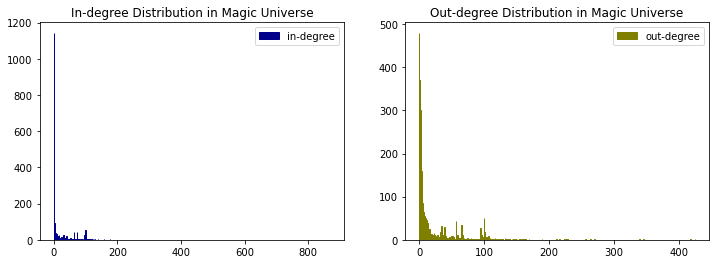

In [48]:

degreeCount = collections.Counter(in_degrees)
in_degree, in_count = zip(*degreeCount.items())
degreeCount = collections.Counter(out_degrees)
out_degree, out_count = zip(*degreeCount.items())
width = 1.0
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(in_degree,in_count, align='center', width=width,edgecolor ='darkblue',color = 'darkblue',label='in-degree')
plt.title('In-degree Distribution in Magic Universe')
plt.legend()
plt.subplot(1,2,2)
plt.bar(out_degree,out_count, align='center', width=width,edgecolor ='olive',color = 'olive',label='out-degree')
plt.legend()
plt.title('Out-degree Distribution in Magic Universe')
plt.savefig('./magic_degree_dis.png')
plt.show()

In [52]:
from community import community_louvain
G_undirect = GCC.to_undirected()
partition = community_louvain.best_partition(G_undirect,random_state=2020)

In [53]:
partition

{'16th_century_Potions_Professor': 0,
 '1992_Gryffindor-Slytherin_Quidditch_match_spectators': 1,
 '1996_Gryffindor_Quidditch_Keeper_trials_spectators': 1,
 'A._Fenetre': 2,
 'Abbott': 1,
 'Abel_Treetops': 3,
 "Abernathy's_wand": 4,
 'Abernathy': 4,
 'Abigail_Nicola': 5,
 'Abigail_R._Cankus': 4,
 'Able_Fleming': 4,
 'Able_Spudmore': 6,
 'Abracadabra': 2,
 'Abraham_Grimblehawk': 0,
 'Abraham_Potter': 4,
 'Abraxas_Malfoy': 0,
 'Aceline_Faure': 1,
 'Achilles_Tolliver': 4,
 'Acolyte_thug': 4,
 'Action_figure': 1,
 'Actor_who_played_Crapaud': 7,
 'Actor_who_played_Grenouille': 7,
 'Adalbert_Waffling': 8,
 'Adrian': 2,
 'Adrian_Tutley': 3,
 'Agilbert_Fontaine': 1,
 "Agnes's_son": 3,
 'Agnes': 3,
 'Agnes_Monkleigh': 3,
 'Alain_Lacroix': 7,
 'Alannis': 9,
 'Alanza_Alves': 1,
 'Alasdair_Maddock': 7,
 'Alastair': 1,
 "Alastor_Moody's_father": 1,
 "Alastor_Moody's_file": 1,
 "Alastor_Moody's_mother": 1,
 "Alastor_Moody's_spiders": 1,
 "Alastor_Moody's_wand": 1,
 'Alastor_Moody': 1,
 'Albanian_pea

In [54]:
par_class = set(partition.values())
par_class_dict = {}
for v in partition.values():
    str_v = str(v)
    if str_v not in par_class_dict.keys():
        par_class_dict[str_v] = 1
    else:
        par_class_dict[str_v] += 1
par_class_dict

{'0': 260,
 '1': 987,
 '2': 75,
 '3': 78,
 '4': 138,
 '5': 157,
 '6': 3,
 '7': 102,
 '8': 183,
 '9': 39,
 '10': 49,
 '11': 55,
 '12': 48,
 '13': 11,
 '14': 16,
 '15': 21,
 '16': 4,
 '17': 38,
 '18': 3,
 '19': 3,
 '20': 3,
 '21': 6,
 '22': 4,
 '23': 5,
 '24': 6}

In [ ]:
import json
json_file = './data/cha_fandom_page/16th_century_Potions_Professor.json'
with open(json_file,'r') as f:
    text = json.load(f)

# print(text)
import re
pattern=re.compile(r'<a href="/wiki/.*?" title=".*?">')
result= pattern.findall(str(text))

list_href=[]
list_title=[]
print(type(result),len(result))
for x in result:
    x=x.split(' title')
    href=x[0].split('href="/wiki/')[-1].split('"')[0]
    title=x[1].split('="')[-1].split('"')[0]
    list_href.append(href)
    list_title.append(title)

    
print(list_href[:25])
print(list_title[:25])

In [161]:

# try out


baseurl = "https://harrypotter.fandom.com/api.php?"
action = "action=parse"
# prop = "prop=revisions&rvprop=content&rvparse=1"
format_ = "format=json"

each_cha  = 'Devil'
page = "page={}".format(cha_list_word)
query = "{}{}&{}&{}".format(baseurl, action, page,format_)

r = requests.get(query)
text= r.json()
print(text)
fandom_folder = './data/cha_fandom_page'
file_path = os.path.join(fandom_folder,file_saving_reading_name(each_cha)+'.json')

with open(file_path,'w') as f:
    json.dump(text,f)

{'parse': {'title': 'Devil', 'pageid': 95140, 'revid': 1293221, 'text': {'*': '<div class="mw-parser-output"><p>\n<aside role="region" class="portable-infobox pi-background pi-theme-spirit pi-layout-default">\n<figure class="pi-item pi-image" data-source="image">\n\t<a href="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest?cb=20160605110157" class="image image-thumbnail"\n\t   title="">\n\t\t<img src="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest/scale-to-width-down/286?cb=20160605110157" srcset="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest/scale-to-width-down/286?cb=20160605110157 1x, https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest/scale-to-width-down/572?cb=20160605110157 2x" class="pi-image-thumbnail" alt="" width="270" height="441"\n\t\t     data-image-key="Devil.jpg" data-image-name="Devil.jpg"/>\n\t\t\n\t</a>\n\t\n</figure>\n<section 

In [42]:
url = 'https://harrypotter.fandom.com/wiki/Devil'
r = requests.get(url)
text= r.text

In [154]:
import requests
baseurl = "https://harrypotter.fandom.com/api.php?"

query = baseurl+'action=query&prop=revisions&titles=Devil&rvprop=content&rvparse=1&format=json'
r = requests.get(query)
text= r.json()

In [155]:
text

{'batchcomplete': '',
 'warnings': {'main': {'*': 'Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce> for notice of API deprecations and breaking changes.'},
  'revisions': {'*': 'The parameter "rvparse" has been deprecated.\nBecause "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used.'}},
 'query': {'pages': {'95140': {'pageid': 95140,
    'ns': 0,
    'title': 'Devil',
    'revisions': [{'*': '<div class="mw-parser-output"><p>\n<aside role="region" class="portable-infobox pi-background pi-theme-spirit pi-layout-default">\n<figure class="pi-item pi-image" data-source="image">\n\t<a href="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest?cb=20160605110157" class="image image-thumbnail"\n\t   title="">\n\t\t<img src="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devi

In [ ]:
# 